In [1]:
import numpy as np
import scipy as sp
import librosa
import matplotlib.pyplot as plt  
import pywt
import sounddevice as sd
import soundfile as sf

In [2]:
speech, sr_s = sf.read('speech_utterance.wav')
music, sr_m = sf.read('music.wav')
#sr_s

In [9]:
def energy(s, sr, w):
    s1 = s*s
    
    window = np.hamming(sr*w)
    
    return np.convolve(s1, window)

In [10]:
def zero_crossings(s, sr, w):
    zeros = np.zeros(1)
    
    t1 = np.concatenate([zeros, s])
    t2 = np.concatenate([s, zeros])
    
    s2 = np.abs(np.sign(t2) - np.sign(t1))
    
    window = np.ones(int(sr*w))
    
    return np.convolve(s2, window)

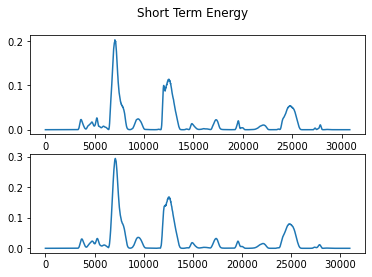

In [18]:
fig, axs = plt.subplots(2)
fig.suptitle('Short Term Energy')
axs[0].plot(energy(speech, 16000, 0.02))
axs[1].plot(energy(speech, 16000, 0.03))

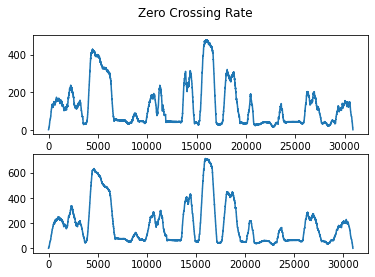

In [14]:
fig, axs = plt.subplots(2)
fig.suptitle('Zero Crossing Rate')
axs[0].plot(zero_crossings(speech, sr_s, 0.02))
axs[1].plot(zero_crossings(speech, sr_s, 0.03))

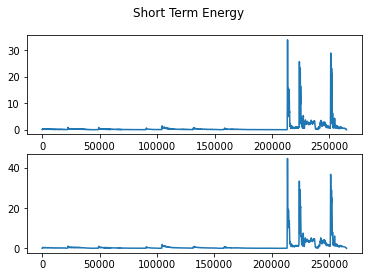

In [17]:
fig, axs = plt.subplots(2)
fig.suptitle('Short Term Energy')
axs[0].plot(energy(music, 16000, 0.02))
axs[1].plot(energy(music, 16000, 0.03))

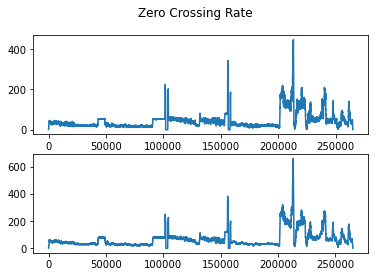

In [16]:
fig, axs = plt.subplots(2)
fig.suptitle('Zero Crossing Rate')
axs[0].plot(zero_crossings(music, sr_m, 0.02))
axs[1].plot(zero_crossings(music, sr_m, 0.03))